In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

In [3]:
df = pd.read_csv('shopping_trends.csv')
selected_cols = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]
selected_cols.columns = ['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']


Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_cols)

Використайте метод ліктя, щоб визначити оптимальну кількість кластерів. Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів. Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

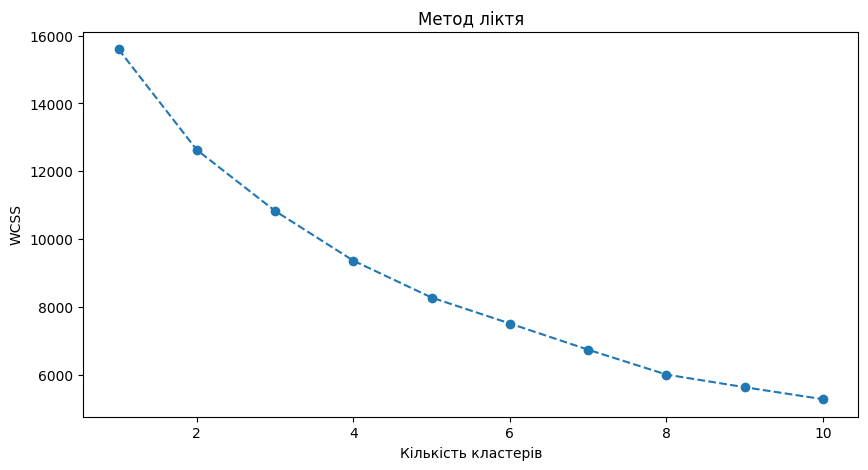

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

Кластеризація за допомогою K-means:

Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.

Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.

In [12]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
selected_cols = selected_cols.assign(cluster=clusters)

Якщо ви хочете візуалізувати дані, які мають більше двох ознак, ви можете використовувати метод головних компонентів (PCA) для зменшення розмірності даних і подальшої візуалізації. PCA допоможе вам зменшити кількість ознак до 2 або 3, щоб побудувати графіки.

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

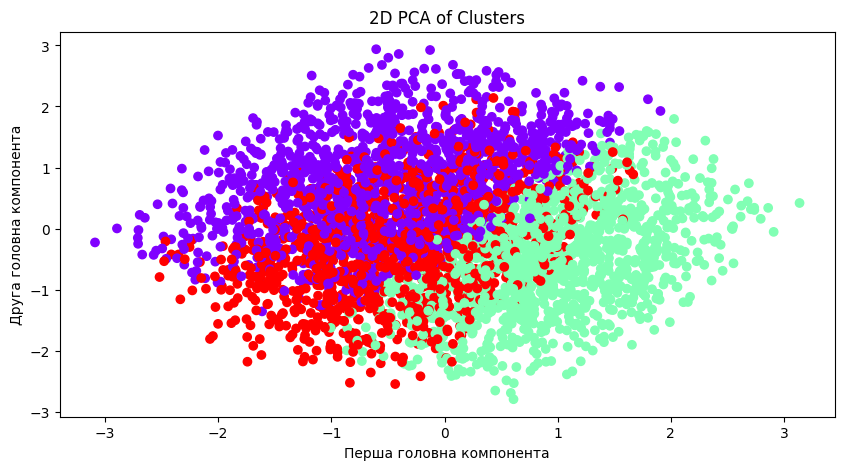

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.title('2D PCA of Clusters')
plt.show()